# FIFA 2019 ANALYSIS

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/dell/Downloads/FIFA_data.csv")

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18206 entries, 0 to 18205
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18206 non-null  int64  
 1   ID                        18206 non-null  int64  
 2   Name                      18206 non-null  object 
 3   Age                       18206 non-null  int64  
 4   Photo                     18206 non-null  object 
 5   Nationality               18206 non-null  object 
 6   Flag                      18206 non-null  object 
 7   Overall                   18206 non-null  int64  
 8   Potential                 18206 non-null  int64  
 9   Club                      17965 non-null  object 
 10  Club Logo                 18206 non-null  object 
 11  Value                     18206 non-null  object 
 12  Wage                      18206 non-null  object 
 13  Special                   18206 non-null  int64  
 14  Prefer

In [5]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18206.000000,18158.000000,18158.000000,18158.000000,18146.000000,...,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000,18158.000000
mean,9102.500000,214296.582555,25.122707,66.239811,71.307591,1597.825113,1.113228,2.947296,2.361328,19.545354,...,48.549455,58.649135,47.282024,47.698095,45.661196,16.616588,16.391673,16.232460,16.389140,16.711312
std,5255.763836,29965.130308,4.669582,6.907491,6.136538,272.585782,0.394041,0.660474,0.756180,15.947892,...,15.704062,11.435858,19.904872,21.664572,21.289697,17.695768,16.907363,16.503232,17.035107,17.955522
min,0.000000,16.000000,16.000000,47.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.250000,200315.250000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9102.500000,221757.500000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13653.750000,236528.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18205.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
df.shape

(18206, 89)

In [7]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [8]:
df.tail(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [9]:
df.nunique()

Unnamed: 0        18206
ID                18206
Name              17193
Age                  29
Photo             18206
                  ...  
GKHandling           70
GKKicking            79
GKPositioning        79
GKReflexes           76
Release Clause     1244
Length: 89, dtype: int64

In [10]:
df.nunique().count()

89

In [11]:
df.isnull().values.sum()

76983

In [12]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [13]:
(df.isnull().sum()/(len(df)))*100              #percentage of missing values in each row

Unnamed: 0        0.000000
ID                0.000000
Name              0.000000
Age               0.000000
Photo             0.000000
                    ...   
GKHandling        0.263649
GKKicking         0.263649
GKPositioning     0.263649
GKReflexes        0.263649
Release Clause    8.590575
Length: 89, dtype: float64

<Axes: >

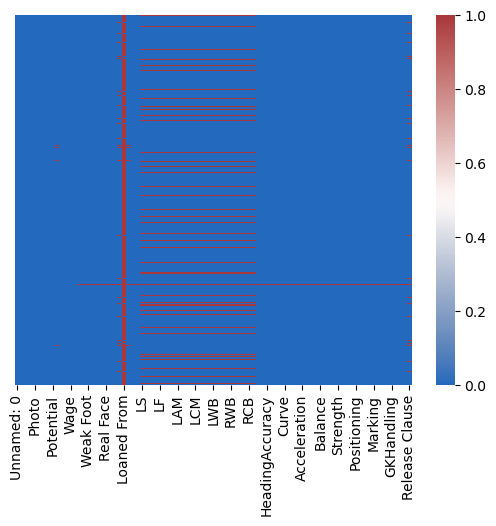

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="vlag")          #Visualizing null values

In [15]:
df.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [16]:
df.drop(['ID', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until'], axis=1, inplace=True)                  
#dropping unwanted column

<Axes: >

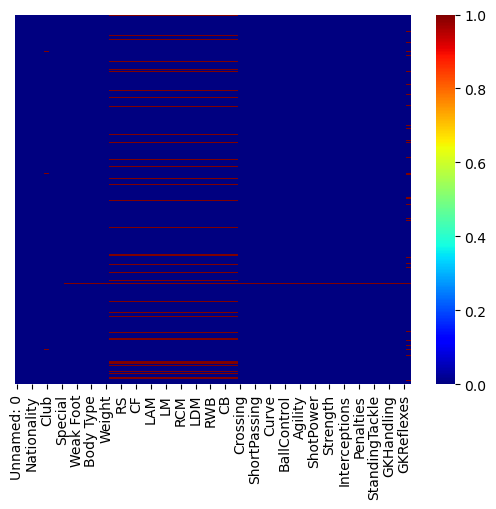

In [17]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="jet")

In [18]:
df.dropna(subset=['LS'], inplace=True)
df.dropna(subset=['ST'], inplace=True)
df.dropna(subset=['RS'], inplace=True)
df.dropna(subset=['LW'], inplace=True)
df.dropna(subset=['LF'], inplace=True)
df.dropna(subset=['CF'], inplace=True)
df.dropna(subset=['RF'], inplace=True)
df.dropna(subset=['RW'], inplace=True)
df.dropna(subset=['LAM'], inplace=True)
df.dropna(subset=['CAM'], inplace=True)
df.dropna(subset=['RAM'], inplace=True)
df.dropna(subset=['LM'], inplace=True)
df.dropna(subset=['LCM'], inplace=True)
df.dropna(subset=['CM'], inplace=True)
df.dropna(subset=['RCM'], inplace=True)
df.dropna(subset=['RM'], inplace=True)
df.dropna(subset=['LWB'], inplace=True)
df.dropna(subset=['LDM'], inplace=True)
df.dropna(subset=['CDM'], inplace=True)
df.dropna(subset=['RDM'], inplace=True)
df.dropna(subset=['RWB'], inplace=True)
df.dropna(subset=['LB'], inplace=True)
df.dropna(subset=['LCB'], inplace=True)
df.dropna(subset=['CB'], inplace=True)
df.dropna(subset=['RCB'], inplace=True)
df.dropna(subset=['RB'], inplace=True)

In [19]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1379
Length: 80, dtype: int64

<Axes: >

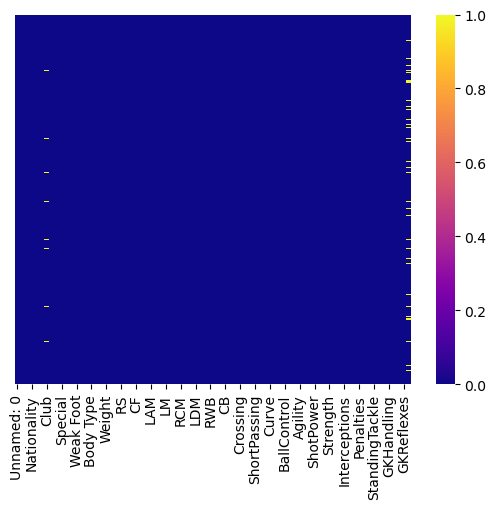

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="plasma")

In [21]:
df['Club'].fillna(method='ffill' , inplace=True)

<Axes: >

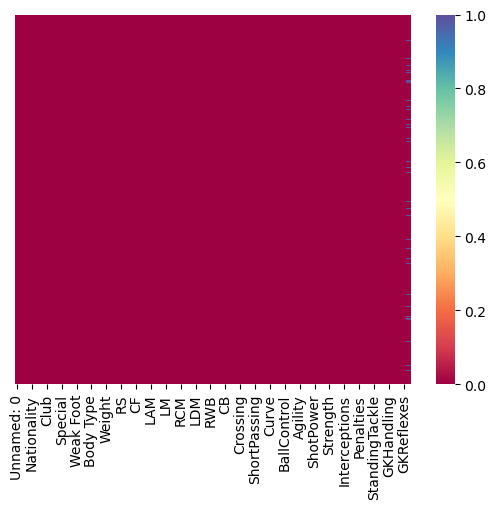

In [22]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="Spectral")

In [23]:
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace=True)

In [24]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1379
Length: 80, dtype: int64

In [25]:
df['Release Clause'].fillna(method='bfill' , inplace=True)

In [26]:
df.isna().sum()

Unnamed: 0        0
Name              0
Age               0
Nationality       0
Overall           0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 80, dtype: int64

<Axes: >

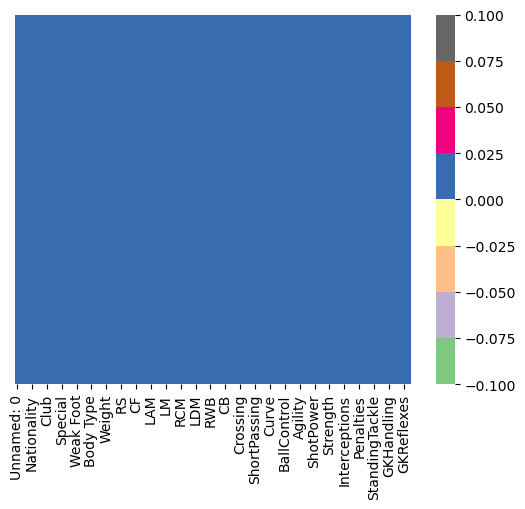

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="Accent")

In [28]:
top10Player = df[['Name', 'Age', 'Nationality', 'Overall']].head(10)       #Top 10 player from the data

top10Player

,Name,Age,Nationality,Overall
0,L. Messi,31,Argentina,94
1,Cristiano Ronaldo,33,Portugal,94
2,Neymar Jr,26,Brazil,92
4,K. De Bruyne,27,Belgium,91
5,E. Hazard,27,Belgium,91
6,L. Modrić,32,Croatia,91
7,L. Suárez,31,Uruguay,91
8,Sergio Ramos,32,Spain,91
10,R. Lewandowski,29,Poland,90
11,T. Kroos,28,Germany,90


Text(0.5, 1.0, 'Top 5 Football Player in FIFA 2019')

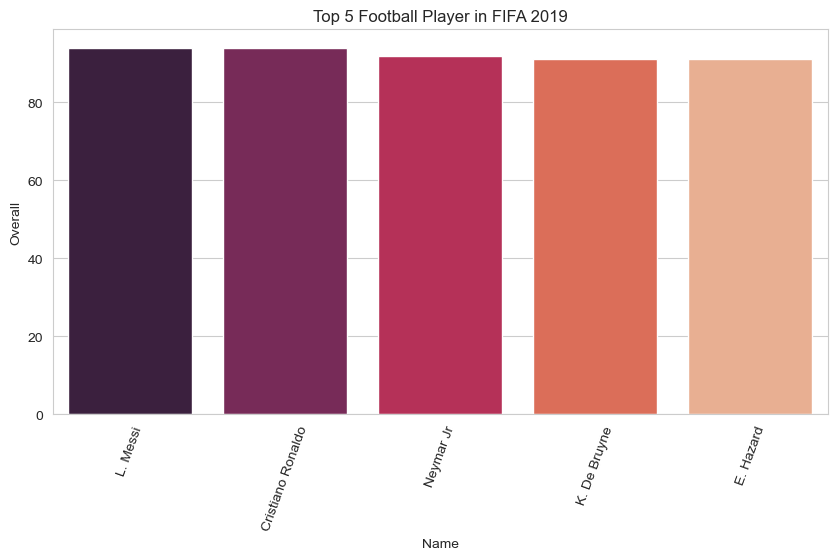

In [29]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(y='Overall', x='Name', data=df, order=df.sort_values('Overall',ascending=False).Name.iloc[:5], palette='rocket')
plt.xticks(rotation=70)
plt.title('Top 5 Football Player in FIFA 2019')

Text(0.5, 1.0, 'Top 5 Football Player in FIFA 2019 and their Age')

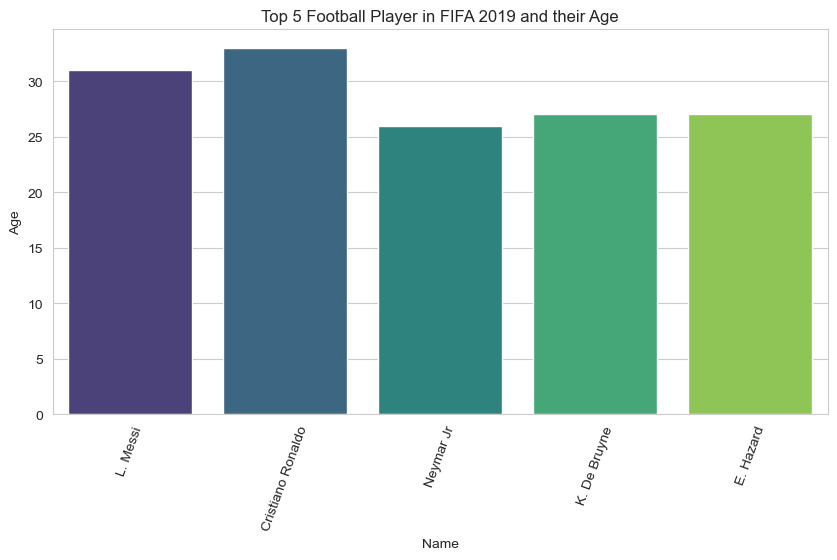

In [30]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(y='Age', x='Name', data=df, order=df.Name.iloc[:5], palette='viridis')
plt.xticks(rotation=70)
plt.title('Top 5 Football Player in FIFA 2019 and their Age')

In [31]:
a = df.groupby('Nationality')['Nationality'].count()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Argentina'),
  Text(1, 0, 'Portugal'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Belgium'),
  Text(5, 0, 'Croatia'),
  Text(6, 0, 'Uruguay'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Germany')])

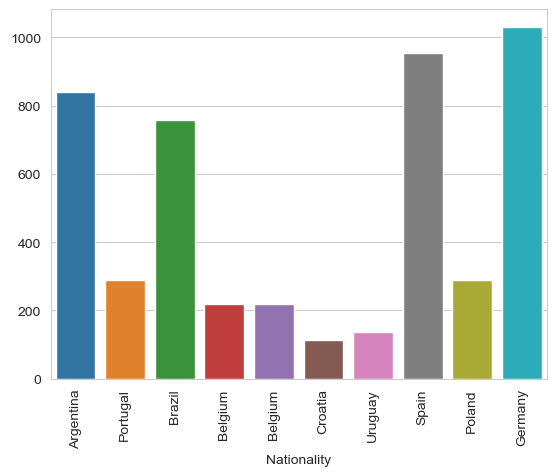

In [32]:
sns.barplot(x=a.index, y=a.values, order=df.Nationality.iloc[:10])
plt.xticks(rotation=90)

In [33]:
a = df.groupby('Preferred Foot')['Preferred Foot'].count()

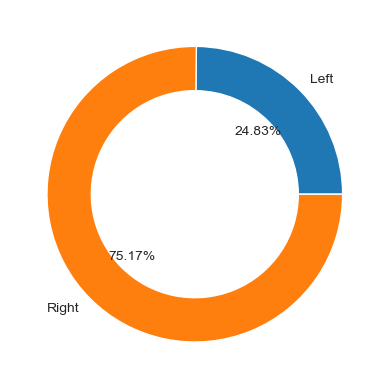

In [34]:
plt.pie(a, labels = a.index, autopct='%.2f%%', wedgeprops=dict(width=0.3))
plt.show()

<Axes: xlabel='Potential', ylabel='Count'>

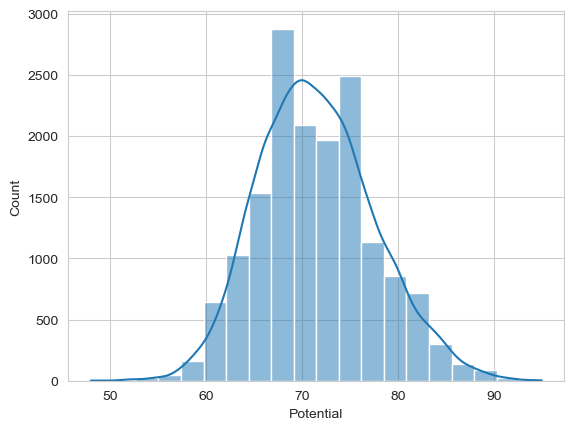

In [35]:
sns.histplot(df['Potential'], bins=20, kde=True)

<Axes: xlabel='Overall', ylabel='Potential'>

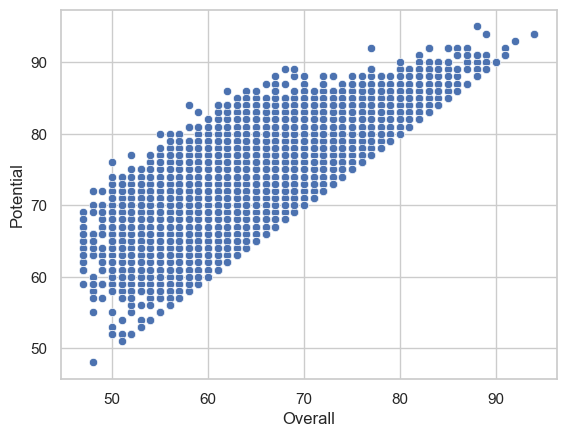

In [54]:
sns.scatterplot(x='Overall', y='Potential', data=df)

<Axes: xlabel='Overall', ylabel='Potential'>

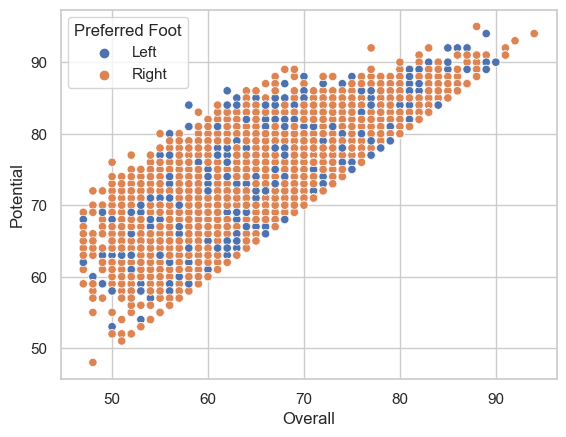

In [55]:
sns.scatterplot(x='Overall', y='Potential', hue='Preferred Foot', data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x21c4de4b0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21c4e1dca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c4e1d2650>],
 'medians': [<matplotlib.lines.Line2D at 0x21c4e1de090>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c4a4f5ad0>],
 'means': []}

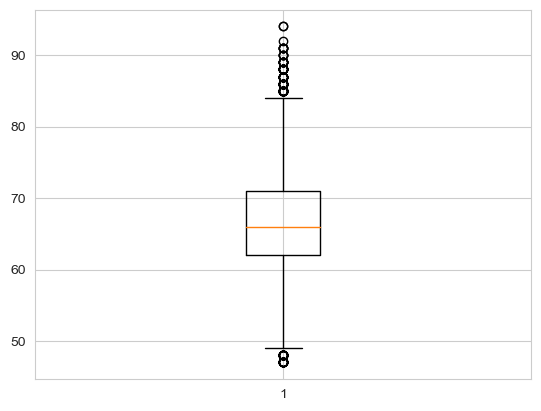

In [37]:
plt.boxplot(df.Overall)

In [38]:
a = df.groupby("Preferred Foot")["Preferred Foot"].count()

<Axes: xlabel='Preferred Foot', ylabel='count'>

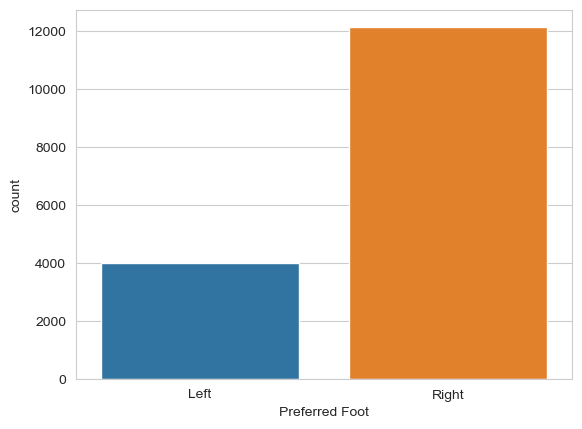

In [39]:
sns.countplot(x="Preferred Foot", data=df)

<Axes: xlabel='Preferred Foot', ylabel='Age'>

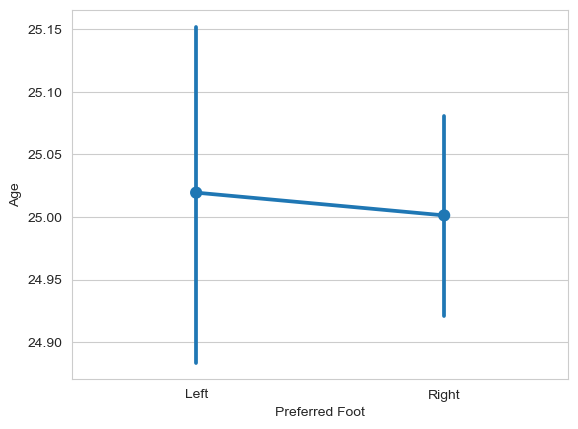

In [40]:
sns.pointplot(x="Preferred Foot", y="Age", data=df)

<Axes: xlabel='Overall', ylabel='Age'>

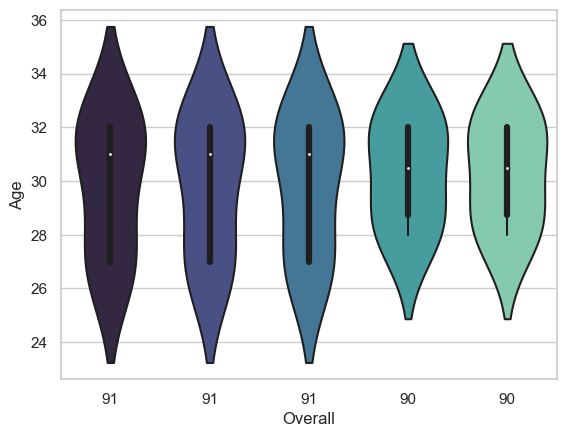

In [41]:
sns.set(style='whitegrid')
sns.violinplot(x='Overall', y='Age', data=df, order=df.Overall.iloc[5:10], palette='mako')

<Axes: xlabel='Age'>

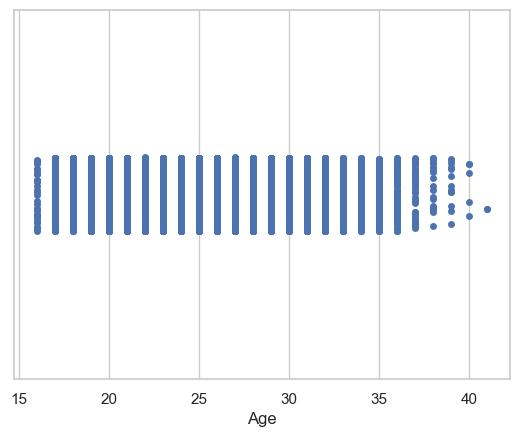

In [42]:
sns.stripplot(data=df, x="Age")

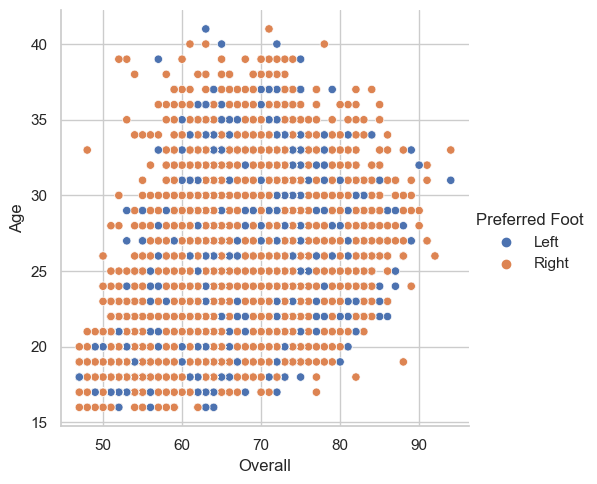

In [48]:
sns.relplot(x='Overall', y='Age', hue='Preferred Foot', data=df)

<Axes: xlabel='Age', ylabel='Density'>

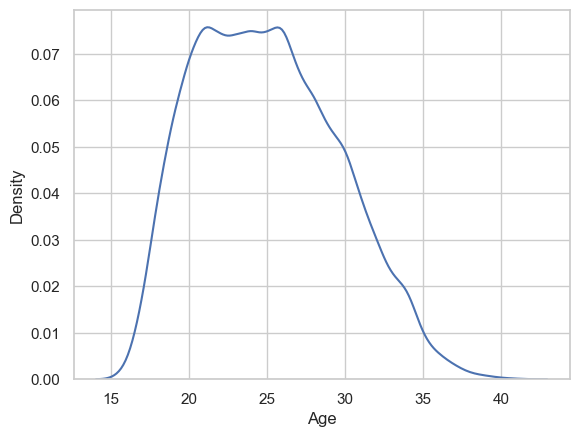

In [50]:
sns.kdeplot(x='Age', data=df)

<Axes: xlabel='Overall', ylabel='Density'>

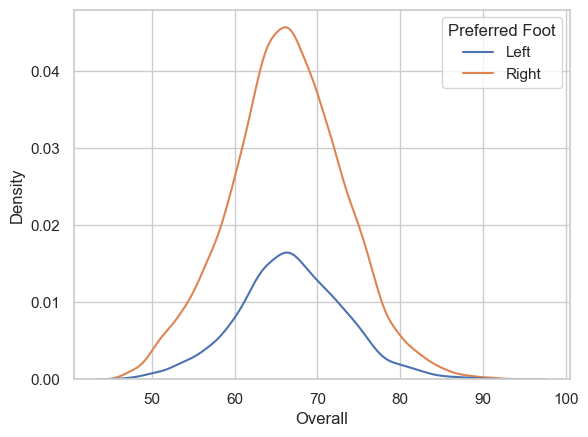

In [52]:
sns.kdeplot(x='Overall', hue='Preferred Foot', data=df)

<Axes: xlabel='Overall', ylabel='Proportion'>

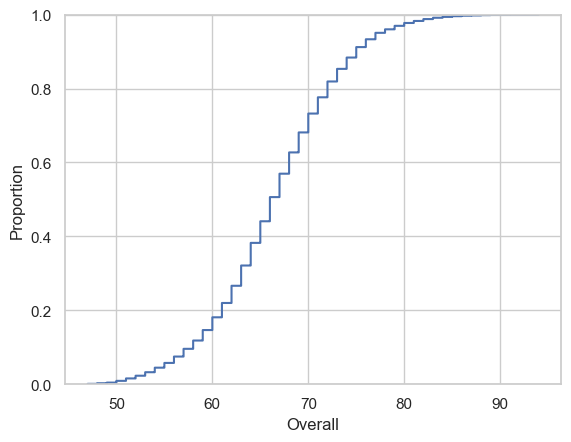

In [53]:
sns.ecdfplot(x='Overall', data=df)

<Axes: xlabel='Overall', ylabel='Potential'>

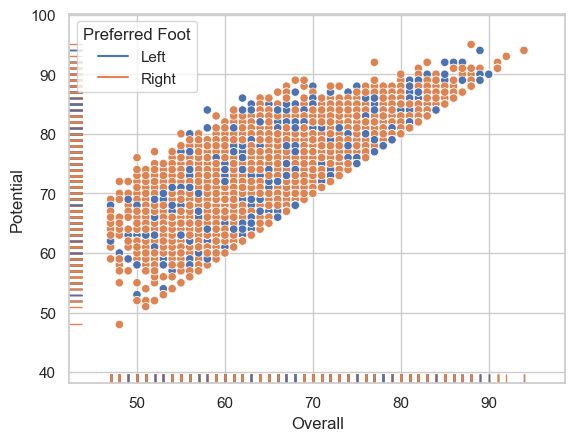

In [56]:
sns.scatterplot(x='Overall', y='Potential', hue='Preferred Foot', data=df)
sns.rugplot(x='Overall', y='Potential', hue='Preferred Foot', data=df)